# Scotiabank 19 Bloor branch customer reviews collection and analysis

## we want to know a special Scotiabank branch's customer service reviews, first we need collect data from google reviews

In [18]:
#引入函式庫
import requests 
import json
import pandas as pd
import csv

header=['author','text','time','rating']
with open('./scotiabank_19Bloor.csv','w',encoding='utf-8',newline='') as f:
            writer=csv.writer(f)
            writer.writerow(header)
# 超連結
review_all=[]
# link=['IZw','GQQ','LQQ','NZw','QQQ','SZw','VQQ']
# for i in link:
#     url='https://www.google.com/maps/preview/review/listentitiesreviews?authuser=0&hl=en&gl=ca&pb=!1m2!1y9931786434679736249!2y15389144167557880970!2m2!2i10!3sCAESBkVnSUl'+i+'%3D%3D!3e1!4m5!3b1!4b1!5b1!6b1!7b1!5m2!1swpBxY5_OLsOw5NoPsNitgAM!7e81'
link=['IZw','GQQ','LQQ','NZw','QQQ','SZw','VQQ','DZw','XZw','aQQ', 'IQQ']
for i in link:
    url='https://www.google.com/maps/preview/review/listentitiesreviews?authuser=0&hl=en&gl=ca&pb=!1m2!1y4636265548553115325!2y4103936624230433398!2m2!2i10!3sCAESBkVnSUl'+i+'%3D%3D!3e1!4m5!3b1!4b1!5b1!6b1!7b1!5m2!1srVJyY9L2GPOcptQPksyhoA0!7e81'
  
    # url = 'https://www.google.com/maps/preview/review/listentitiesreviews?authuser=0&hl=en&gl=ca&pb=!1m2!1y4636265548553115325!2y4103936624230433398!2m1!2i10!3e1!4m5!3b1!4b1!5b1!6b1!7b1!5m2!1sz45xY7aNHvSl1QHDnaHgDw!7e81'
# 發送get請求
    text = requests.get(url).text
    # 取代掉特殊字元，這個字元是為了資訊安全而設定的喔。
    pretext = ')]}\''
    text = text.replace(pretext,'')
    # 把字串讀取成json
    soup = json.loads(text)

    # 取出包含留言的List 。
    conlist = soup[2]
# print(conlist)
    reviews_all = []
# 逐筆抓出
    for i in conlist:
        reviews=[]
        author = str(i[0][1])
        text = str(i[1])
        time = str(i[3])
        rating=str(i[4])

        reviews.append({'author': author,
                       'text':text,
                       'time':time,
                        'rating':rating
                       }
                      )
#         print(reviews)
        for review in reviews:
            author=review['author']
            text=review['text']
            time=review['time']
            rating=review['rating']
            
            reviews_all.append({'author': author,
                           'text':text,
                           'time':time,
                            'rating':rating})
#         print(reviews_all)
    data_duple=(author,text,time,rating)
    df=pd.DataFrame(reviews_all)
    df.to_csv('scotiabank_19Bloor.csv',mode='a',line_terminator='\n',sep=',',index=False)

## Read the .csv file and prepare data for analysis

In [19]:
data=pd.read_csv('./scotiabank_19Bloor.csv',sep=',')
data.shape

(121, 4)

In [20]:
data.nunique()

author    101
text       17
time       86
rating      6
dtype: int64

In [21]:
data=data.drop_duplicates()
data.shape

(101, 4)

In [22]:
data.head()

,author,text,time,rating
0,author,text,time,rating
1,Andre,5 years ago,Scotiabank is just a terrible bank all around....,1
2,Karlee Bamford,2 years ago,Today I had two extremely different interactio...,1
3,Finance Horse,3 years ago,Was turned away from the branch twice saying n...,1
4,Adam O'Brien,5 years ago,Absolutely terrible bank. Rude customer servic...,1


In [23]:
data.columns=['author','date','review','rating']
data

,author,date,review,rating
0,author,text,time,rating
1,Andre,5 years ago,Scotiabank is just a terrible bank all around....,1
2,Karlee Bamford,2 years ago,Today I had two extremely different interactio...,1
3,Finance Horse,3 years ago,Was turned away from the branch twice saying n...,1
4,Adam O'Brien,5 years ago,Absolutely terrible bank. Rude customer servic...,1
...,...,...,...,...
105,Manuelito Torres,a year ago,None,1
106,Dion MacConnell,2 months ago,None,4
107,Preriit Ahuja,6 years ago,None,2
108,Andrey Fukivskyi,7 months ago,None,5


In [31]:
data=data[1:]
data.reset_index(drop=True)


,author,date,review,rating
0,Karlee Bamford,2 years ago,Today I had two extremely different interactio...,1
1,Finance Horse,3 years ago,Was turned away from the branch twice saying n...,1
2,Adam O'Brien,5 years ago,Absolutely terrible bank. Rude customer servic...,1
3,Edward (Kawaii Reviews and More),4 years ago,Where customer service goes to die.\n\nI’ve ha...,1
4,Jennifer Fernandes,6 years ago,Very poor service. I went in last Saturday to ...,1
...,...,...,...,...
94,Manuelito Torres,a year ago,None,1
95,Dion MacConnell,2 months ago,None,4
96,Preriit Ahuja,6 years ago,None,2
97,Andrey Fukivskyi,7 months ago,None,5


In [33]:
data.isnull().sum()

author    0
date      0
review    0
rating    0
dtype: int64

In [34]:
data.describe()

,author,date,review,rating
count,99,99,99,99
unique,99,16,84,5
top,Karlee Bamford,3 years ago,None,1
freq,1,25,16,67


In [60]:
import matplotlib.pyplot as plt

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 2 to 109
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   author  99 non-null     object
 1   date    99 non-null     object
 2   review  99 non-null     object
 3   rating  99 non-null     object
dtypes: object(4)
memory usage: 3.9+ KB


In [50]:
data.rating=pd.to_numeric(data.rating)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 2 to 109
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   author  99 non-null     object
 1   date    99 non-null     object
 2   review  99 non-null     object
 3   rating  99 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 5.9+ KB


In [58]:
data.groupby('rating')['author'].count()

rating
1    67
2     9
3     2
4     3
5    18
Name: author, dtype: int64

rating
1    67
2     9
3     2
4     3
5    18
Name: author, dtype: int64
--------------------------------------------------
The average rate of Scotiabank 19 Bloor Branch is: 1.9494949494949494


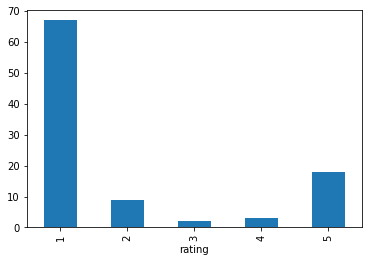

In [63]:
data.groupby('rating')['author'].count().plot(kind='bar')
print(data.groupby('rating')['author'].count())
print("-"*50)
print(f"The average rate of Scotiabank 19 Bloor Branch is: {data.rating.mean()}")

## the above graph shows the average customer rating is 1.95 and the majority of google reviews fell into low rating 

In [64]:
print(data.describe().transpose())

        count      mean       std  min  25%  50%  75%  max
rating   99.0  1.949495  1.573854  1.0  1.0  1.0  2.0  5.0


In [65]:
import pandas as pd
pd.options.display.max_rows = 10

import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk import FreqDist
nltk.download('stopwords') # run this one time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
nltk.download('wordnet')
from nltk.util import ngrams
from nltk.corpus import stopwords, wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanfe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hanfe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanfe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [68]:
def clean(s):
    s = s.lower()                   #Converting to lower case
    s = re.sub(r'[^\w\s]', ' ', s)  #Removing punctuation
    s = re.sub(r'[\d+]', ' ', s)    #Removing Numbers
    s = s.strip()                   #Removing trailing spaces
    s = re.sub(' +', ' ', s)        #Removing extra whitespaces
    return s

In [69]:
data["review"] = data["review"].apply(lambda x: clean(x))

In [70]:
data

,author,date,review,rating
2,Karlee Bamford,2 years ago,today i had two extremely different interactio...,1
3,Finance Horse,3 years ago,was turned away from the branch twice saying n...,1
4,Adam O'Brien,5 years ago,absolutely terrible bank rude customer service...,1
5,Edward (Kawaii Reviews and More),4 years ago,where customer service goes to die \n\ni ve ha...,1
6,Jennifer Fernandes,6 years ago,very poor service i went in last saturday to a...,1
...,...,...,...,...
105,Manuelito Torres,a year ago,none,1
106,Dion MacConnell,2 months ago,none,4
107,Preriit Ahuja,6 years ago,none,2
108,Andrey Fukivskyi,7 months ago,none,5


In [71]:
data["review"] = data["review"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [72]:
data["review"][2]

'today two extremely different interactions employees branch one call jestina reprimanded poor customer service others said reviews apparently dropped credit card someone found turned branch received super friendly helpful phone call branch saying found could come time closing debit card id claim went get made feel like crazy trying steal someone else card impossible card handed teller called jestina incredibly rude listen times tried tell lost found situation collect newly issued credit card finally got info extremely annoyed tell looking wrong place whole time told next time bank called anyone called matter record name phone number simply way could help situation without information asked probably times called called three tellers standing either side staring giving sympathetic eyes finally person front entrance desk came coffee break wow problems immediately resolved card returned incredibly unnecessarily frustrating'

In [73]:
st = PorterStemmer()
data['cleaned_review'] = data['review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

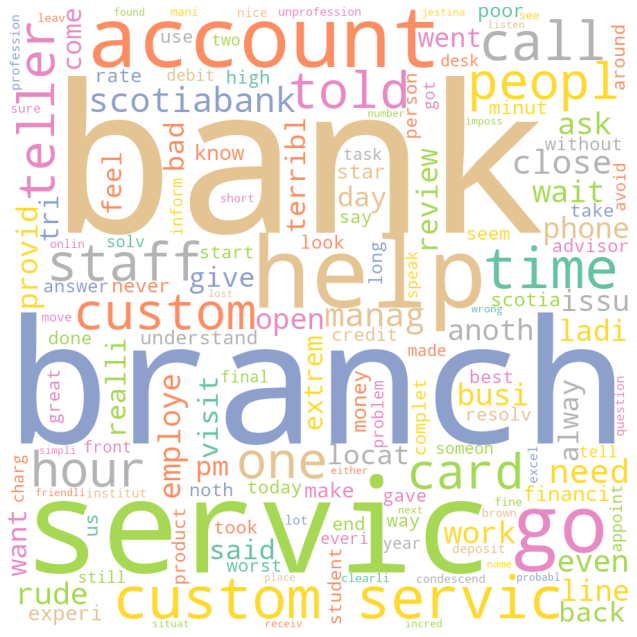

In [74]:
reviews = pd.Series(data["cleaned_review"].tolist()).astype(str)
plt.figure(figsize = (9, 9))
rev_wcloud_all = WordCloud(width = 900, height = 900,background_color='white', colormap='Set2', max_words = 150).generate(''.join(reviews))
plt.imshow(rev_wcloud_all)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

# Tokenization

### Tokenization is splitting a body of text into smaller units, such as individual words or terms. Each of these smaller units are called tokens

In [75]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [76]:
data['review']=data['review'].apply(str)

In [77]:
tokenizer = RegexpTokenizer(r'\w+')
data["Reviews_Token"] = data["review"].apply(lambda x: tokenizer.tokenize(x))

In [78]:
data['Reviews_Token']

2      [today, two, extremely, different, interaction...
3      [turned, away, branch, twice, saying, advisor,...
4      [absolutely, terrible, bank, rude, customer, s...
5      [customer, service, goes, die, worst, experien...
6      [poor, service, went, last, saturday, add, hus...
                             ...                        
105                                               [none]
106                                               [none]
107                                               [none]
108                                               [none]
109                                               [none]
Name: Reviews_Token, Length: 99, dtype: object

In [79]:
lemm = WordNetLemmatizer()

In [80]:
def to_wordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemm_text(text):
    nltk_tagged = nltk.pos_tag(text)
    # Result = (text, pos_tag)
    wordnet_tagged = map(lambda x: (x[0], to_wordnet(x[1])), nltk_tagged)
    lemm_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemm_sentence.append(word)
        else:
            lemm_sentence.append(lemm.lemmatize(word, tag))
    return lemm_sentence

In [81]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hanfe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [82]:
data["Reviews_Lemm"] = data["Reviews_Token"].apply(lambda x: lemm_text(x))

In [84]:
data[["Reviews_Token", "Reviews_Lemm"]].sample(14)

,Reviews_Token,Reviews_Lemm
8,"[amazing, financial, institution, loyal, happy...","[amaze, financial, institution, loyal, happy, ..."
40,"[useless, teller, pathetic, service, branch, f...","[useless, teller, pathetic, service, branch, f..."
74,"[worst, service, refused, help]","[bad, service, refuse, help]"
19,"[happy, customer, service, today, specially, b...","[happy, customer, service, today, specially, b..."
100,[none],[none]
...,...,...
52,"[terrible, terrible, terrible, wish, bank, exi...","[terrible, terrible, terrible, wish, bank, exi..."
35,"[worst, banking, experience, ever, went, thurs...","[worst, banking, experience, ever, go, thursda..."
15,"[terrible, service, unprofessional, told, look...","[terrible, service, unprofessional, tell, look..."
47,"[slowest, bank, employees, need, know, lot, pe...","[slow, bank, employee, need, know, lot, people..."


In [85]:
data.to_csv("Cleaned_Reviews_10Bloor.csv")

In [86]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [87]:
#Analyze positive and negative statements from the review
def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

#Analyze personal opinion, emotion or judgment 
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

In [88]:
data.dropna(subset=['Reviews_Lemm'], inplace = True)
data.reset_index(drop=True, inplace=True)

In [90]:
data['Subjectivity'] = data['Reviews_Lemm'].apply(getSubjectivity)
data['Polarity'] = data['Reviews_Lemm'].apply(getPolarity)
data.sample(5)

,author,date,review,rating,cleaned_review,Reviews_Token,Reviews_Lemm,Subjectivity,Polarity
66,Tiffanie Rolo,5 years ago,worst service refused help,1,worst servic refus help,"[worst, service, refused, help]","[bad, service, refuse, help]",0.666667,-0.700000
8,Sule McGowan,4 years ago,simple task getting change wanted bills tips u...,1,simpl task get chang want bill tip upcom event...,"[simple, task, getting, change, wanted, bills,...","[simple, task, get, change, want, bill, tip, u...",0.247024,-0.058333
22,Jose Ceron,3 years ago,went confirm student enrollment student accoun...,1,went confirm student enrol student account get...,"[went, confirm, student, enrollment, student, ...","[go, confirm, student, enrollment, student, ac...",0.300000,-0.150000
25,Indranil Dutta,3 years ago,worst service ever experienced brown lady fron...,1,worst servic ever experienc brown ladi front d...,"[worst, service, ever, experienced, brown, lad...","[bad, service, ever, experience, brown, lady, ...",0.364286,-0.026190
21,jinyuan cai,5 years ago,scotialbank really terrible bank hell closes p...,1,scotialbank realli terribl bank hell close pm ...,"[scotialbank, really, terrible, bank, hell, cl...","[scotialbank, really, terrible, bank, hell, cl...",0.687085,-0.098268


In [91]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

data['Analysis_Polarity'] = data['Polarity'].apply(get_Polarity_Analysis)

data['Analysis_Subjectivity'] = data['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
#df.head()


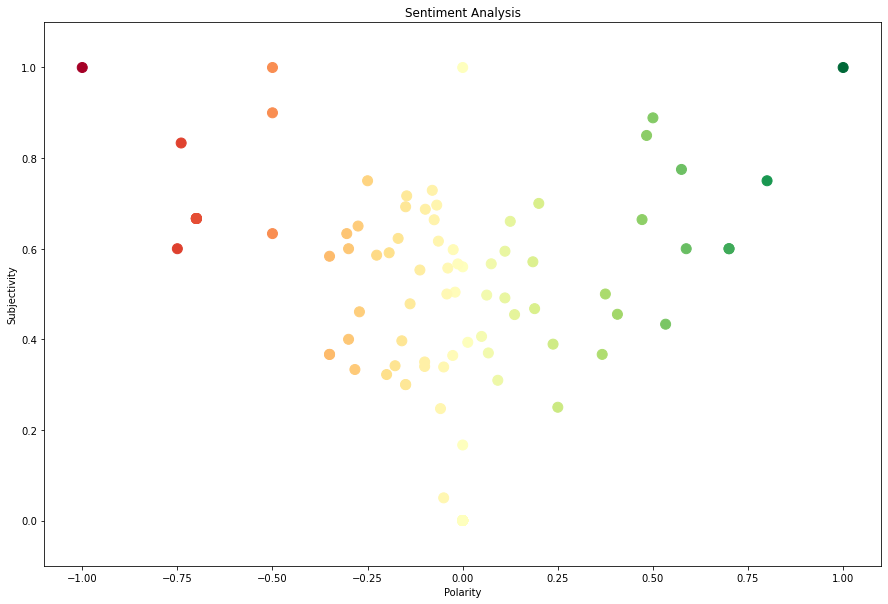

In [93]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(data['Polarity'], data['Subjectivity'], c=data['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

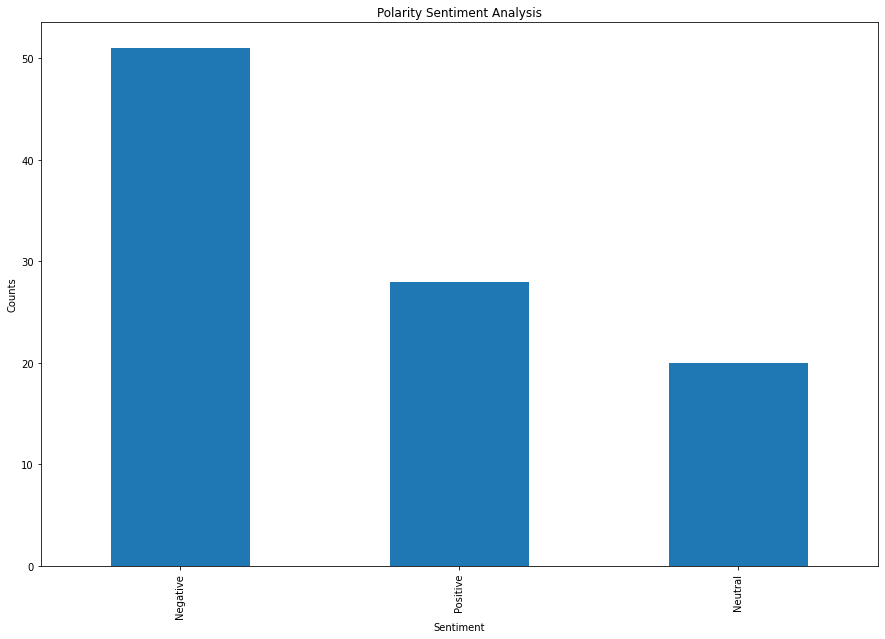

In [94]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Counts')

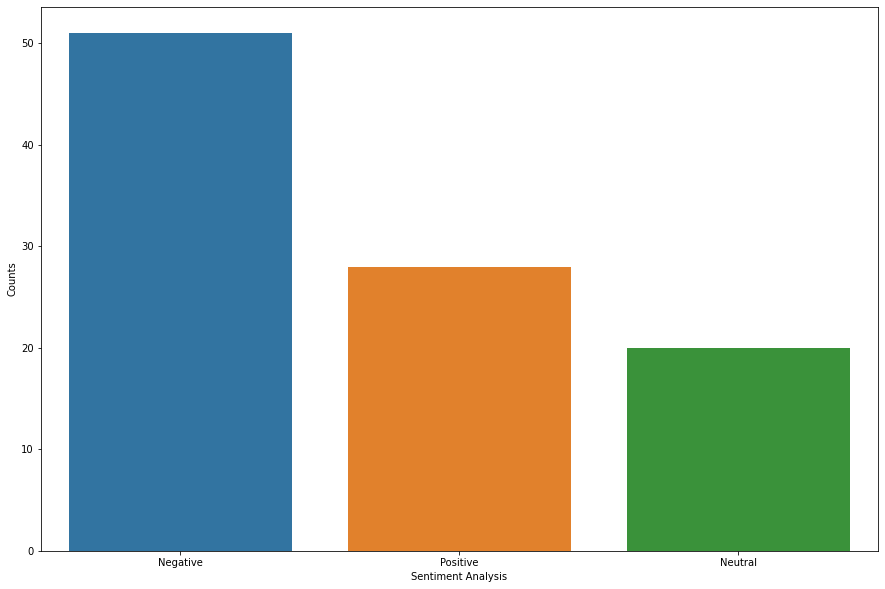

In [96]:
# create a function to analysis the tweet as positive negative and neutral
plt.figure(figsize=(15,10))
def getAnalysis(score):
    if score == 0:
        return 'Neutral'
    elif score < 0:
        return 'Negative'
    else:
        return 'Positive'

data["Analysis"] = data["Polarity"].apply(getAnalysis)

sns.countplot(x=data['Analysis'],data=data)
plt.xlabel('Sentiment Analysis')
plt.ylabel('Counts')

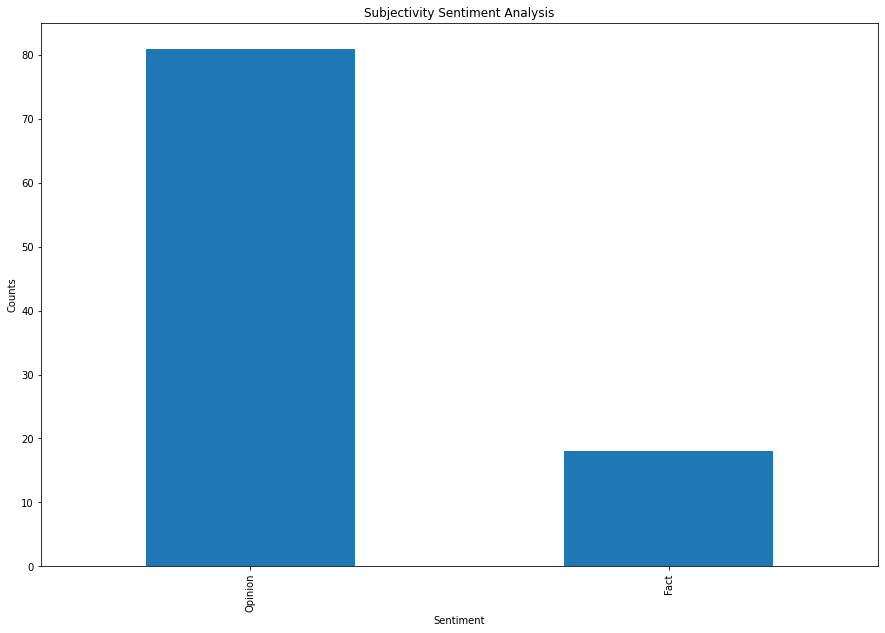

In [97]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

C:\Users\hanfe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


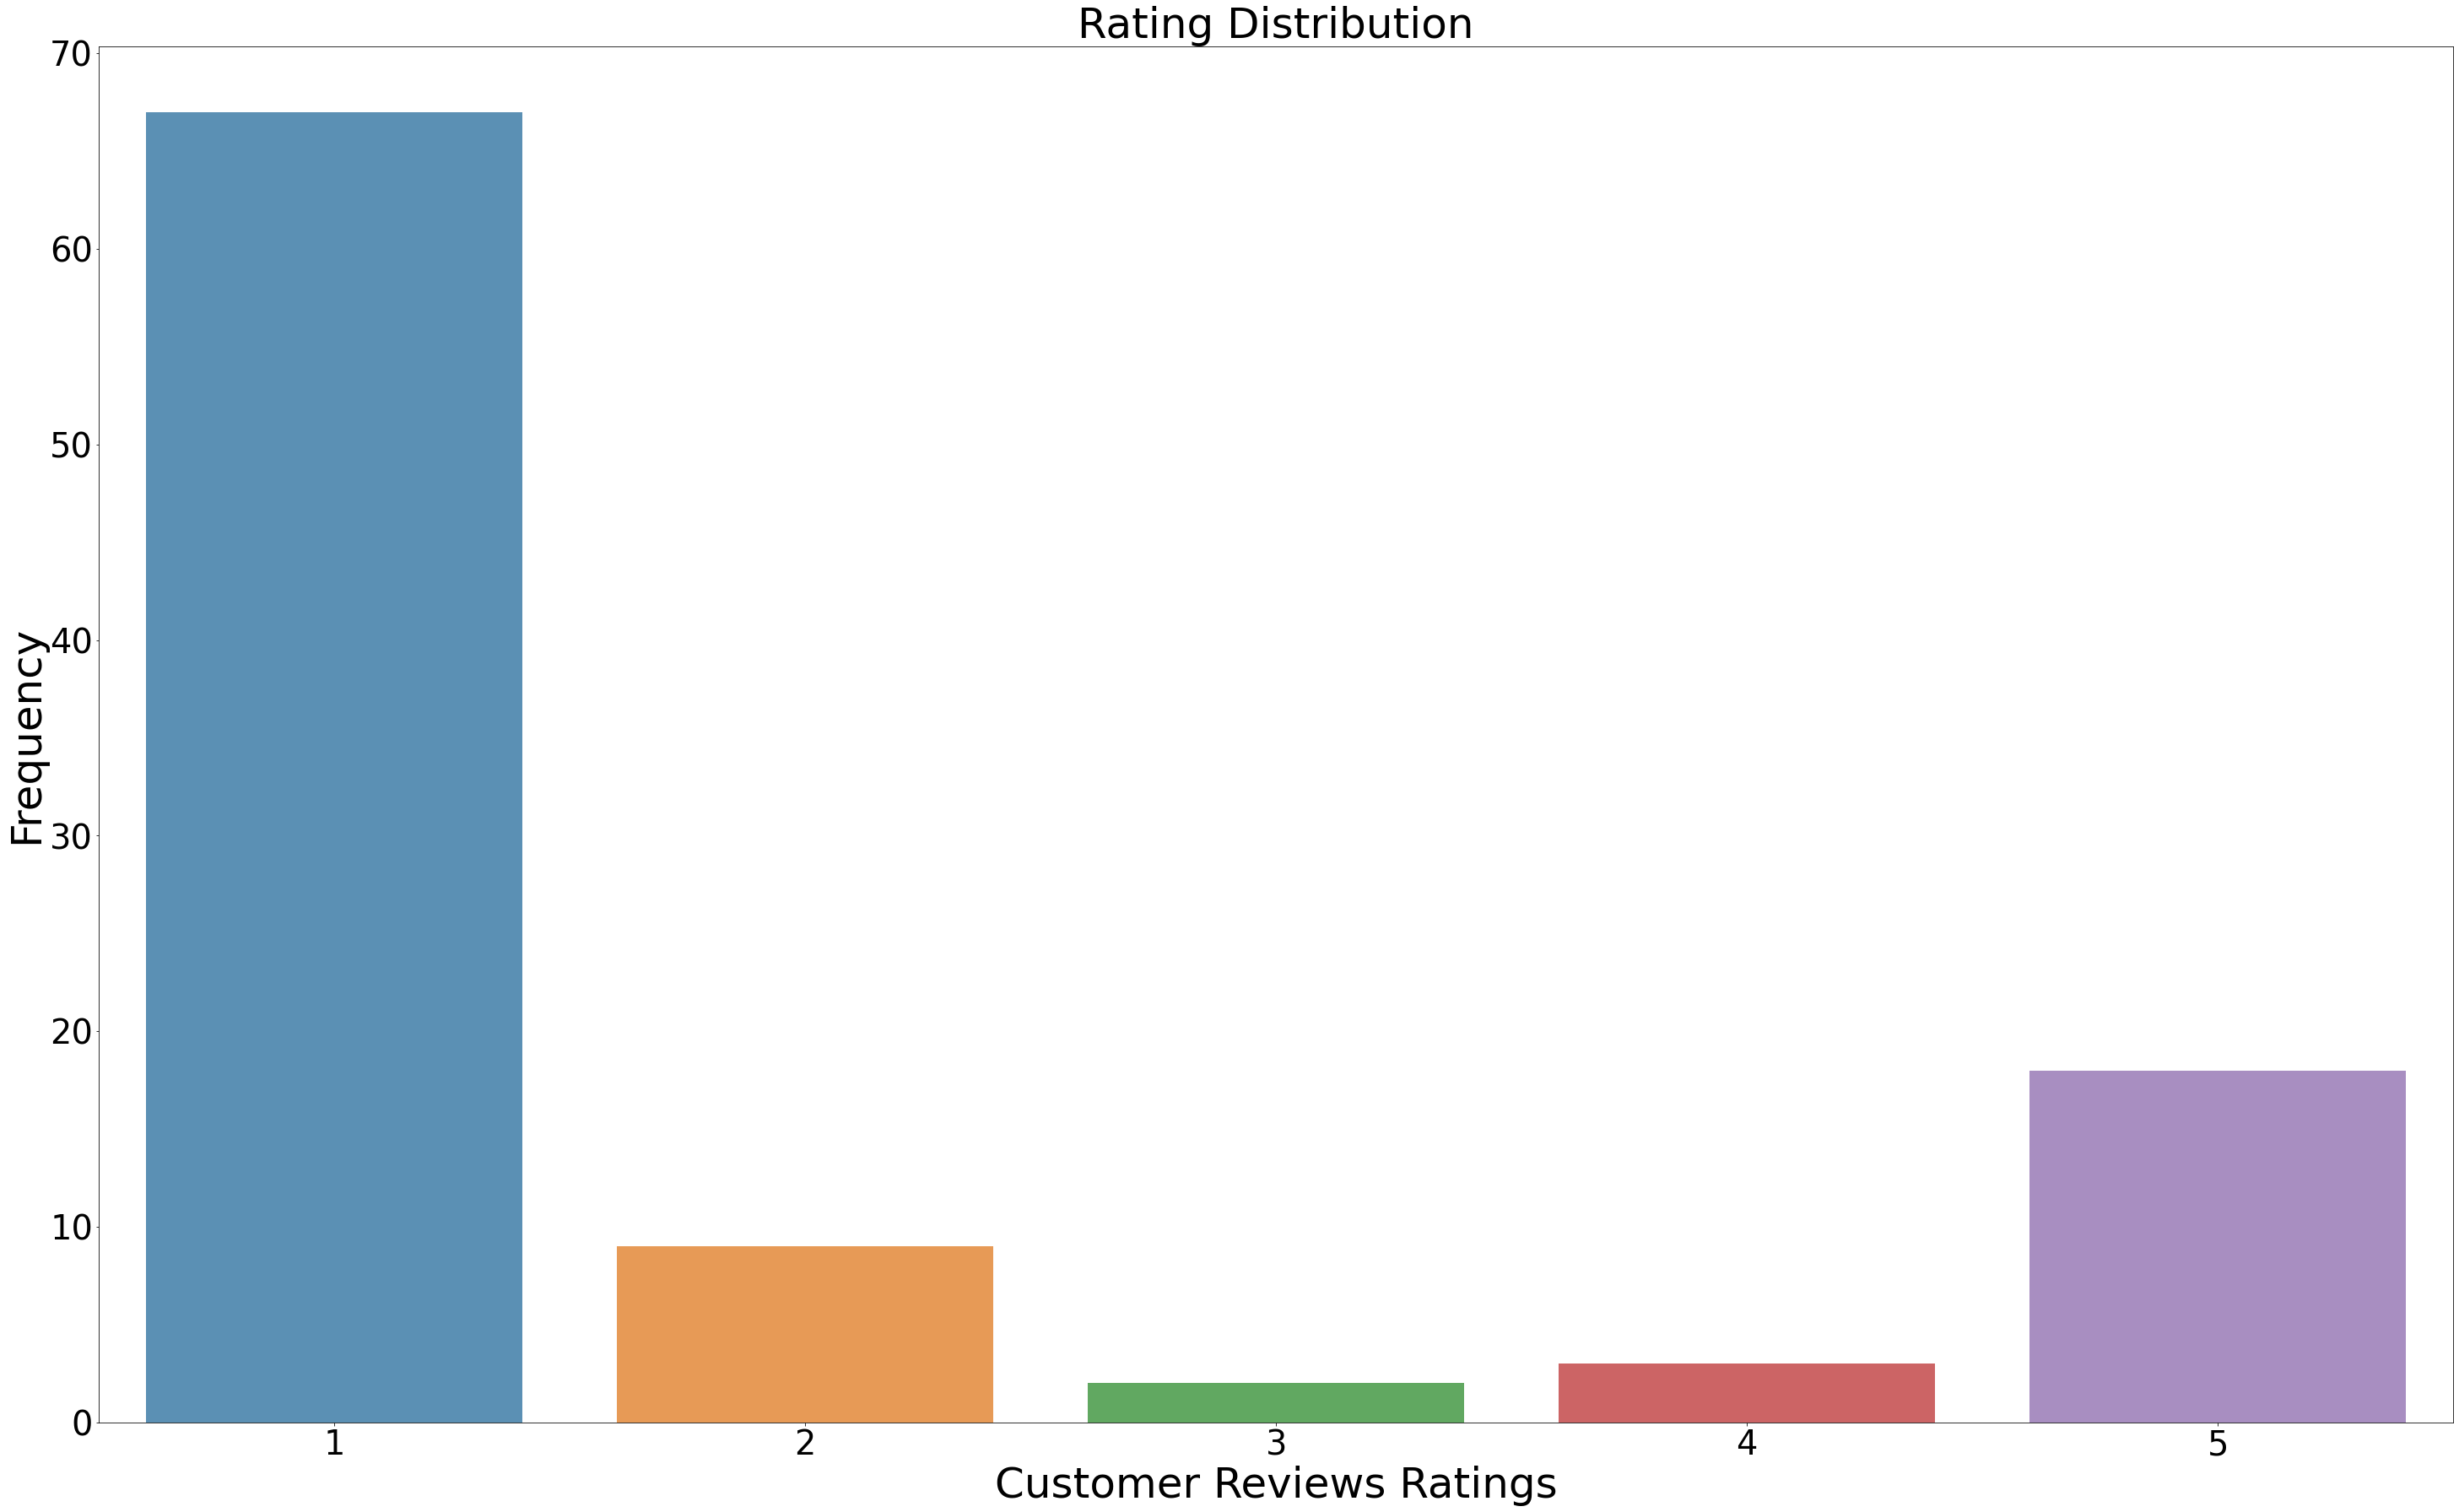

In [101]:
data['Rating_level'] = data['rating'].replace({1:'VERY NEGATIVE',2:'NEGATIVE',3:'NEUTRAL',4:'POSITIVE',5:'VERY POSITIVE'})
x_rating = data.rating.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Customer Reviews Ratings', fontsize=50)
plt.xticks(fontsize=40)
plt.show()

In [102]:
import itertools
import collections

In [105]:
review_list = list(itertools.chain.from_iterable(data['Reviews_Lemm']))
rev_word_freq = collections.Counter(review_list)

word_freq_DF = pd.DataFrame(rev_word_freq.most_common(20), columns=['Words', 'Count'])
word_freq_DF.head(20)

,Words,Count
0,branch,58
1,bank,52
2,service,48
3,customer,36
4,go,32
...,...,...
15,hour,16
16,none,16
17,give,15
18,one,14


<AxesSubplot:xlabel='Words', ylabel='Count'>

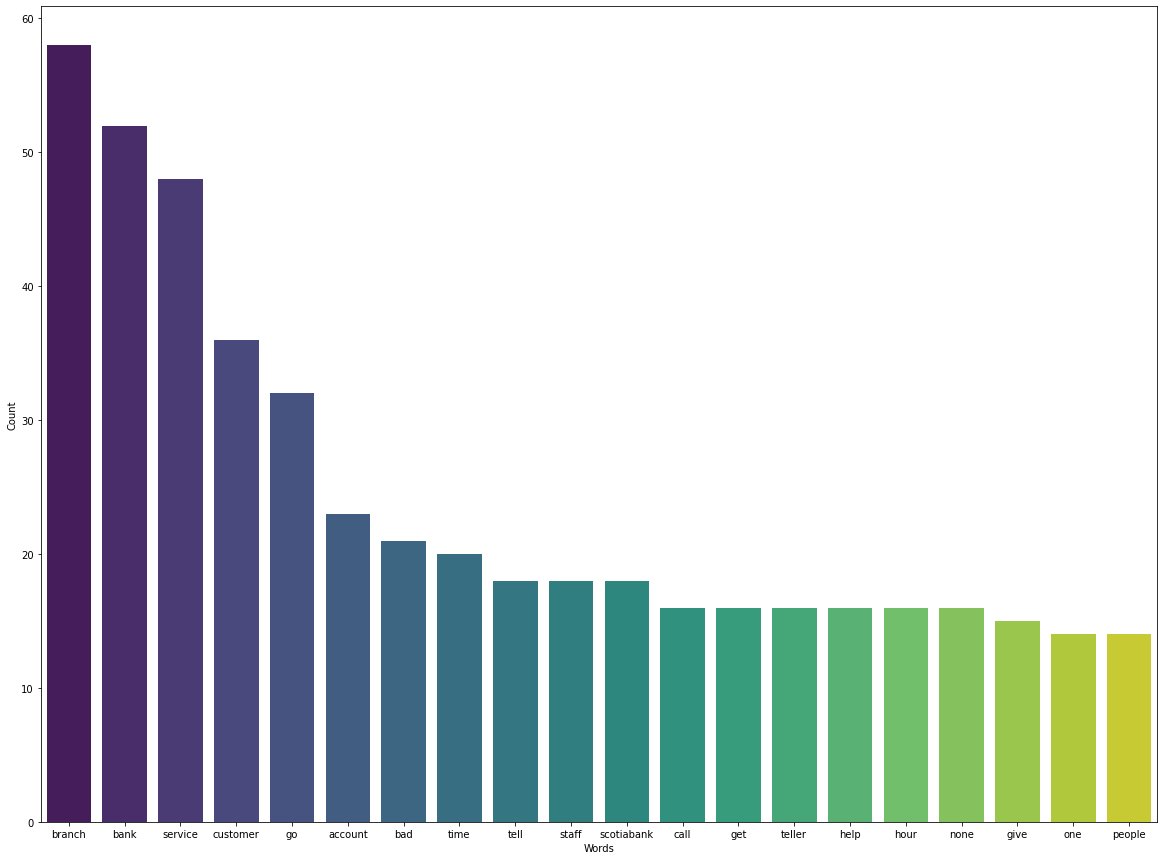

In [106]:
plt.figure(figsize=(20,15)) 
sns.barplot(data = word_freq_DF,x = "Words", y = "Count", palette = 'viridis')